# 1. Unsupervised Learning - Clustering & Market Segmentation

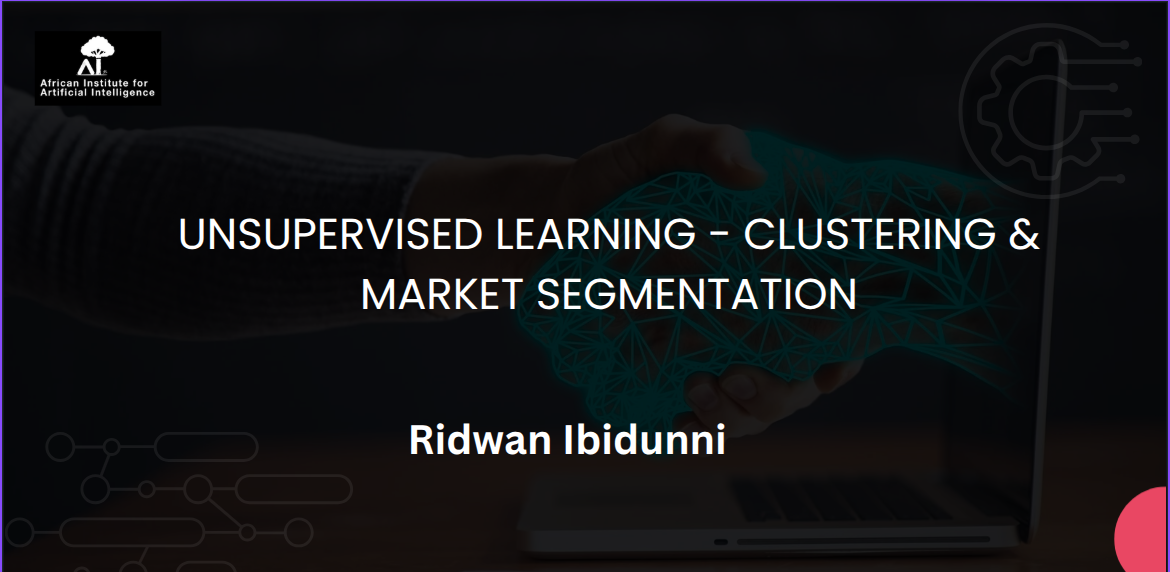

## **Definition Refresher**

### In supervised learning, we had labeled data to guide our algorithms. In unsupervised learning, we work with unlabeled data to discover hidden patterns, structures, and relationships.

## **Today's Focus**

### Customer Segmentation using Clustering Algorithms - the foundation techniques that power marketing strategies, recommendation systems, and business intelligence.

## **Real-world Clustering Applications**

- Marketing: Customer segmentation for targeted campaigns
- Retail: Store layout optimization based on product groupings
- Healthcare: Patient stratification for personalized treatment
- Social Media: Community detection and content recommendation
- Finance: Risk profiling and fraud detection patterns

### The Clustering Method Spectrum

Simple → Complex: K-Means → Hierarchical → DBSCAN → Gaussian Mixture Models


### Key Questions to Frame Any Clustering Problem:

- How many clusters do we expect?
- Are clusters spherical or irregular shaped?
- Do we have noise/outliers in our data?
- Do we need hierarchical relationships between clusters?
- What's the business interpretation of each cluster?

# Problem Statement: E-commerce Customer Segmentation

### **Scenario:**  An online retailer wants to understand their customer base better to create targeted marketing campaigns. They have transaction data but no predefined customer categories.

### **The Challenge:** Customers have diverse purchasing behaviors - some buy frequently but spend little, others make rare but expensive purchases. Traditional demographic segmentation misses behavioral patterns.









**Why Clustering? This is an unsupervised learning problem:**

- No predefined customer categories (unlabeled data)
- Need to discover natural groupings in customer behavior
- Want to understand purchasing patterns for business strategy

**Business Impact:** Effective segmentation can increase marketing ROI by 15-30%

# Data Acquisition and Initial Inspection

**Dataset:** Online Retail Dataset (UCI Machine Learning Repository)
[Source:](https://archive.ics.uci.edu/dataset/352/online+retail)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load IBM HR Analytics Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Quick overview
print(f"Dataset shape: {data.shape}")
print(f"Dataset size: {data.size}")


data.describe().T

Dataset shape: (541909, 8)
Dataset size: 4335272


,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [ ]:
# Check data types and missing values
print(f"\n\t\t  Data types:\n{data.dtypes}")
print(f"\nMissing values: {data.isnull().sum().sum()}")


		  Data types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Missing values: 136534


In [ ]:
missing_value_percentage = data.isnull().mean().sort_values(ascending=False) * 100
print(f"Missing value percentage by column\n", round(missing_value_percentage, 2) )

Missing value percentage by column
 CustomerID     24.93
Description     0.27
StockCode       0.00
InvoiceNo       0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64


In [ ]:
print("duplicates in dataset: ", data.duplicated().sum())

duplicates in dataset:  5268


In [ ]:
#check the number of negative quantity
data[data["Quantity"] < 0 ].shape[0]

10624

In [ ]:
#check for the number of negative unitprice
data[data["UnitPrice"] < 0].shape[0]

2

# Data Preprocessing: Preparing for Clustering

In [ ]:
#removing duplicate
data = data.drop_duplicates()

In [ ]:
print("duplicates in dataset: ", data.duplicated().sum())

duplicates in dataset:  0


In [ ]:
#remove rows where the customerID has missing value
data = data.dropna(subset=['CustomerID'])

In [ ]:
missing_value_percentage = data.isnull().mean().sort_values(ascending=False) * 100
print(f"Missing value percentage by column\n", round(missing_value_percentage, 2) )

Missing value percentage by column
 InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64


In [ ]:
#since we have negative quantity we will like to select only the positive quantive for our analysis
data = data[data["Quantity"] > 0]

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## RFM Analysis Preparation
### RFM (Recency, Frequency, Monetary) is a proven framework for customer segmentation:

- Recency: How recently did the customer make a purchase?
- Frequency: How often does the customer purchase?
- Monetary: How much does the customer spend?

In [ ]:
# Calculate RFM metrics
from datetime import datetime

# Set analysis date (day after last transaction)
analysis_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate total amount for each transaction
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

# Create RFM table
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print("RFM Summary:")
print(rfm.describe())

RFM Summary:
         CustomerID      Recency    Frequency       Monetary
count   4339.000000  4339.000000  4339.000000    4339.000000
mean   15299.936852    92.518322     4.271952    2048.215924
std     1721.889758   100.009747     7.705493    8984.248352
min    12346.000000     1.000000     1.000000       0.000000
25%    13812.500000    18.000000     1.000000     306.455000
50%    15299.000000    51.000000     2.000000     668.560000
75%    16778.500000   142.000000     5.000000    1660.315000
max    18287.000000   374.000000   210.000000  280206.020000


In [ ]:
import numpy as np

# Apply log transformation to the RFM features
rfm['Recency_log'] = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])

print("\nLog-transformed RFM Summary:")
print(rfm[['Recency_log', 'Frequency_log', 'Monetary_log']].describe())


Log-transformed RFM Summary:
       Recency_log  Frequency_log  Monetary_log
count  4339.000000    4339.000000   4339.000000
mean      3.830475       1.345478      6.587044
std       1.340215       0.683138      1.262262
min       0.693147       0.693147      0.000000
25%       2.944439       0.693147      5.728329
50%       3.951244       1.098612      6.506621
75%       4.962845       1.791759      7.415365
max       5.926926       5.351858     12.543284


# Data Preprocessing: Preparing for Classification

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the features you will use for clustering (the log-transformed ones)
features_for_clustering = ['Recency_log', 'Frequency_log', 'Monetary_log']
X_rfm = rfm[features_for_clustering]

# Initialize and fit the StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_rfm)

# Convert the scaled features back into a DataFrame (optional, but good for readability)
scaled_rfm_df = pd.DataFrame(scaled_features, columns=features_for_clustering, index=rfm['CustomerID'])

print("\nScaled RFM Features (Head):")
print(scaled_rfm_df.head())
print("\nScaled RFM Features (Summary - should have mean ~0 and std ~1):")
print(scaled_rfm_df.describe())


Scaled RFM Features (Head):
            Recency_log  Frequency_log  Monetary_log
CustomerID                                          
12346.0        1.462236      -0.955013      3.697687
12347.0       -2.038611       1.074523      1.411820
12348.0        0.373310       0.386437      0.719046
12349.0       -0.622914      -0.955013      0.701362
12350.0        1.424800      -0.955013     -0.611449

Scaled RFM Features (Summary - should have mean ~0 and std ~1):
        Recency_log  Frequency_log  Monetary_log
count  4.339000e+03   4.339000e+03  4.339000e+03
mean   4.912718e-18   2.833001e-16 -2.554613e-16
std    1.000115e+00   1.000115e+00  1.000115e+00
min   -2.341184e+00  -9.550131e-01 -5.219046e+00
25%   -6.611911e-01  -9.550131e-01 -6.803770e-01
50%    9.012174e-02  -3.614119e-01 -6.372078e-02
75%    8.450137e-01   6.533562e-01  6.562951e-01
max    1.564445e+00   5.865344e+00  4.719247e+00


# K-Means Clustering: The Foundation Algorithm

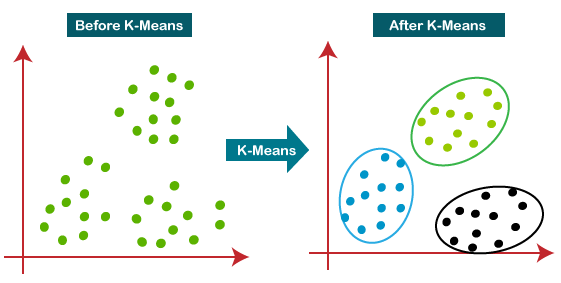

# Using the elbow method to find the optimal number of clusters

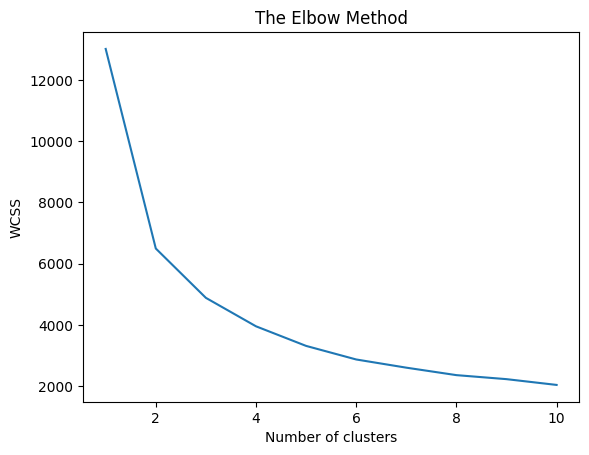

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_rfm_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_rfm_df)

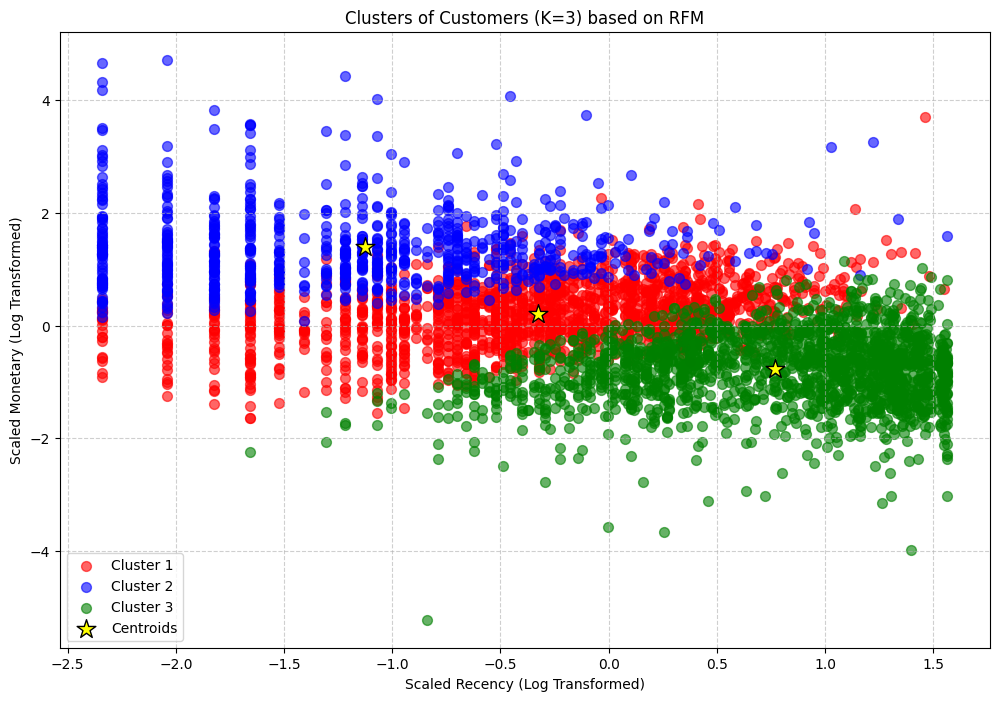

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x_feature_name = 'Recency_log'
y_feature_name = 'Monetary_log'

# Create a NumPy array 'X' from the selected scaled features
X = scaled_rfm_df[[x_feature_name, y_feature_name]].values

# Create a NumPy array 'y_kmeans' from your cluster assignments
y_kmeans = rfm['Cluster'].values

# Get the column indices for centroids from the chosen feature names
x_centroid_idx = scaled_rfm_df.columns.get_loc(x_feature_name)
y_centroid_idx = scaled_rfm_df.columns.get_loc(y_feature_name)

plt.figure(figsize=(12, 8))

if 0 < optimal_k:
    plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1', alpha=0.6)
if 1 < optimal_k:
    plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2', alpha=0.6)
if 2 < optimal_k:
    plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3', alpha=0.6)
if 3 < optimal_k:
    plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4', alpha=0.6)
if 4 < optimal_k:
    plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5', alpha=0.6)
# Add more if statements if optimal_k can be > 5, or consider a loop for dynamic clusters.

plt.scatter(kmeans.cluster_centers_[:, x_centroid_idx], kmeans.cluster_centers_[:, y_centroid_idx], s = 200, c = 'yellow', marker='*', edgecolor='black', label = 'Centroids')
plt.title(f'Clusters of Customers (K={optimal_k}) based on RFM')
plt.xlabel(f'Scaled {x_feature_name.replace("_log", "")} (Log Transformed)')
plt.ylabel(f'Scaled {y_feature_name.replace("_log", "")} (Log Transformed)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **Interactive Coding exercises**

*Follow the links below to practice all these concepts*


1.   [Hands_on_Practice](https://colab.research.google.com/drive/1WDz2P3bD3ok6lLQhG7--Opyha-DgeZ96?usp=sharing)




# **Practice Homework**

*Follow the link below for practice questions*

[African institute for Artificiall Intellgence - AI masterclass](https://github.com/aljebraschool/African-Institute-For-Artificial-Intelligence---AI-Masterclass)

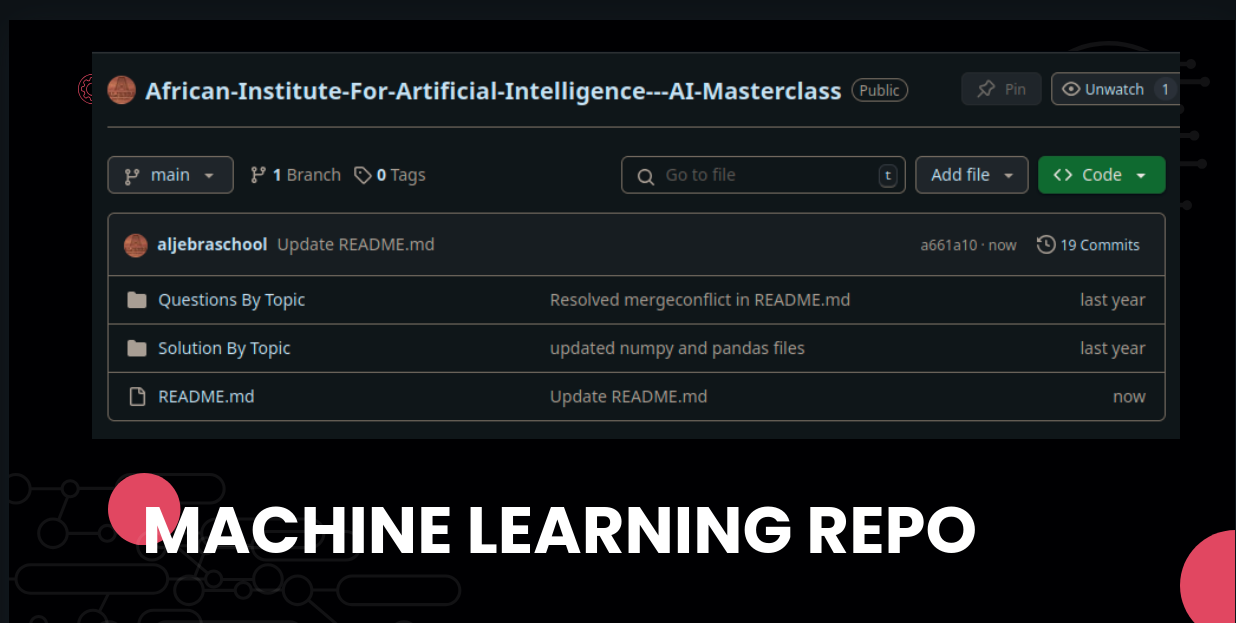

**Other social media links**



*   [Read more on the topic via my blog](https://aljebraschool.hashnode.dev)
*   [Follow me on Linkedin](https://linkedin.com/in/aljebraschool)

